In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
#keras
#pytorch
#scipy
#tensorflow
#scikit

# K-means

In [2]:
!pip install plotly --upgrade

In [3]:
from sklearn.cluster import KMeans

In [4]:
x=[20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y=[1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]  

In [5]:
grafico = px.scatter(x = x, y = y)
grafico.show()

In [6]:
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                        [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                        [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

In [7]:
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [8]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

In [9]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [10]:
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

KMeans(n_clusters=3)

In [11]:
centroides = kmeans_salario.cluster_centers_
centroides

array([[ 0.73953003, -0.72661025],
       [-1.63312883, -0.77505093],
       [ 0.07703438,  1.11413572]])

In [12]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  48.33333333, 1800.        ],
       [  22.66666667, 1700.        ],
       [  41.16666667, 5600.        ]])

In [13]:
rotulos = kmeans_salario.labels_
rotulos

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2], dtype=int32)

In [14]:
grafico1 = px.scatter(x = base_salario[:,0], y = base_salario[:,1], color=rotulos)
grafico2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [12,12,12])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

# Dados randômicos

In [15]:
from sklearn.datasets import make_blobs

In [16]:
X_random, Y_random = make_blobs(n_samples=200, centers=5, random_state=1)

In [17]:
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1])
grafico.show()

In [18]:
kmeans_blobs = KMeans(n_clusters=5)
kmeans_blobs.fit(X_random)

KMeans(n_clusters=5)

In [19]:
rotulos = kmeans_blobs.predict(X_random)
rotulos

array([0, 1, 4, 1, 1, 4, 3, 4, 1, 0, 4, 4, 4, 2, 4, 0, 0, 2, 1, 1, 0, 4,
       3, 4, 3, 2, 1, 3, 3, 2, 1, 3, 0, 4, 1, 0, 2, 1, 2, 0, 2, 2, 3, 3,
       1, 3, 2, 4, 1, 3, 0, 4, 4, 0, 4, 2, 0, 4, 1, 1, 2, 4, 4, 4, 1, 3,
       0, 2, 3, 1, 2, 3, 1, 3, 3, 2, 1, 2, 0, 3, 2, 2, 4, 1, 4, 0, 1, 1,
       1, 2, 3, 4, 0, 3, 4, 2, 3, 0, 1, 2, 0, 1, 3, 2, 3, 1, 2, 1, 4, 0,
       4, 4, 1, 2, 4, 0, 2, 3, 0, 0, 1, 2, 2, 4, 0, 2, 1, 3, 1, 3, 0, 3,
       4, 4, 2, 2, 4, 0, 0, 4, 4, 4, 0, 0, 3, 1, 3, 0, 1, 4, 3, 4, 0, 3,
       4, 2, 2, 2, 0, 1, 3, 0, 2, 0, 3, 2, 2, 2, 4, 3, 2, 3, 3, 4, 0, 1,
       3, 4, 1, 0, 1, 0, 0, 1, 2, 3, 2, 0, 0, 4, 1, 3, 0, 2, 2, 3, 4, 3,
       1, 2], dtype=int32)

In [20]:
centroides = kmeans_blobs.cluster_centers_
centroides

array([[-1.58338528,  4.50520457],
       [-6.87958999, -8.11648104],
       [-9.85620522, -3.91021738],
       [-2.17069756,  1.02591979],
       [-5.90368078, -3.04489641]])

In [21]:
grafico1 = px.scatter(x = X_random[:,0], y = X_random[:,1], color=rotulos)
grafico2 = px.scatter(x = centroides[:,0], y = centroides[:, 1], size=[5,5,5,5,5])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

# Base cartão de crédito


In [22]:
base_cartao = pd.read_csv('credit_card_clients.csv', header = 1)
base_cartao

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0          1      20000    2  ...         0         0                           1
1          2     120000    2  ...         0      2000                           1
2          3      90000    2  ...      1000      5000                           0
3          4      50000    2  ...      1069      1000                           0
4          5      50000    1  ...       689       679                           0
...      ...        ...  ...  ...       ...       ...                         ...
29995  29996     220000    1  ...      5000      1000                           0
29996  29997     150000    1  ...         0         0                           0
29997  29998      30000    1  ...      2000      3100                           1
29998  29999      80000    1  ...     52964      1804                           1
29999  30000      50000    1  ...      1000      1000                           1

[30000 rows x 25 columns]

In [23]:
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5'] + base_cartao['BILL_AMT6']

In [24]:
base_cartao

ID  LIMIT_BAL  SEX  ...  PAY_AMT6  default payment next month  BILL_TOTAL
0          1      20000    2  ...         0                           1        7704
1          2     120000    2  ...      2000                           1       17077
2          3      90000    2  ...      5000                           0      101653
3          4      50000    2  ...      1000                           0      231334
4          5      50000    1  ...       679                           0      109339
...      ...        ...  ...  ...       ...                         ...         ...
29995  29996     220000    1  ...      1000                           0      725349
29996  29997     150000    1  ...         0                           0       21182
29997  29998      30000    1  ...      3100                           1       70496
29998  29999      80000    1  ...      1804                           1      266611
29999  30000      50000    1  ...      1000                           1      230874

[30000 rows x 26 columns]

In [25]:
X_cartao = base_cartao.iloc[:, [1, 25]].values
X_cartao

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [26]:
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)

In [27]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [28]:
wcss = []
for i in range(1, 11):
  kmeans_cartao = KMeans(n_clusters=i, random_state=0)
  kmeans_cartao.fit(X_cartao)
  wcss.append(kmeans_cartao.inertia_)

In [29]:
wcss

[59999.99999999978,
 35196.57080583435,
 20128.132558347686,
 14943.809173865899,
 10707.537016753624,
 8603.395384848965,
 7400.069599689482,
 6353.473303353463,
 5665.823857740179,
 5052.188166408734]

In [30]:
grafico = px.line(x = range (1,11), y = wcss)
grafico.show()

In [31]:
kmeans_cartao = KMeans(n_clusters=5, random_state=0)
rotulos = kmeans_cartao.fit_predict(X_cartao)

In [32]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color=rotulos)
grafico.show()

In [33]:
lista_cliente = np.column_stack((base_cartao, rotulos))
lista_cliente

array([[     1,  20000,      2, ...,      1,   7704,      4],
       [     2, 120000,      2, ...,      1,  17077,      4],
       [     3,  90000,      2, ...,      0, 101653,      4],
       ...,
       [ 29998,  30000,      1, ...,      1,  70496,      4],
       [ 29999,  80000,      1, ...,      1, 266611,      4],
       [ 30000,  50000,      1, ...,      1, 230874,      4]], dtype=int64)

In [34]:
lista_cliente = lista_cliente[lista_cliente[:,26].argsort()]
lista_cliente

array([[ 12686, 130000,      1, ...,      0, 537780,      0],
       [ 12090, 160000,      1, ...,      0, 554777,      0],
       [ 12098, 210000,      2, ...,      0, 784117,      0],
       ...,
       [ 13817,  50000,      2, ...,      0,  88918,      4],
       [ 13811,  40000,      1, ...,      0,  77777,      4],
       [ 30000,  50000,      1, ...,      1, 230874,      4]], dtype=int64)

# Mais atributos

In [35]:
X_cartao_mais = base_cartao.iloc[:,[1,2,3,4,5,25]].values
X_cartao_mais

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]], dtype=int64)

In [36]:
scaler_cartao_mais = StandardScaler()
X_cartao_mais = scaler_cartao_mais.fit_transform(X_cartao_mais)

In [37]:
X_cartao_mais

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

In [38]:
wcss = []
for i in range(1, 11):
  kmeans_cartao_mais = KMeans(n_clusters = i, random_state = 0)
  kmeans_cartao_mais.fit(X_cartao_mais)
  wcss.append(kmeans_cartao_mais.inertia_)

In [39]:
grafico = px.line(x = range(1,11), y = wcss)
grafico.show()

In [40]:
kmeans_cartao_mais = KMeans(n_clusters=4, random_state=0)
rotulos = kmeans_cartao_mais.fit_predict(X_cartao_mais)

In [41]:
rotulos

array([1, 0, 0, ..., 3, 1, 1], dtype=int32)

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2)
X_cartao_mais_pca = pca.fit_transform(X_cartao_mais)

In [44]:
X_cartao_mais_pca.shape

(30000, 2)

In [45]:
grafico = px.scatter(x= X_cartao_mais_pca[:,0], y = X_cartao_mais_pca[:,1], color=rotulos)
grafico.show()

In [46]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[ 22235, 250000,      2, ...,      0, 120233,      0],
       [  6902, 300000,      2, ...,      0, 605733,      0],
       [  6903, 180000,      2, ...,      0,  33111,      0],
       ...,
       [  7847,  30000,      1, ...,      1, 168918,      3],
       [  7866,  50000,      1, ...,      0, 132306,      3],
       [ 15000,  50000,      1, ...,      0, 249711,      3]], dtype=int64)

# Agrupamento hierárquivo

In [47]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [48]:
grafico = px.scatter(x = base_salario[:,0], y =base_salario[:,1])
grafico.show()

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

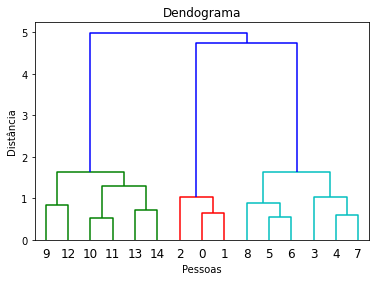

In [50]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância');

In [51]:
from sklearn.cluster import AgglomerativeClustering

hc_salario = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
rotulos = hc_salario.fit_predict(base_salario)

In [52]:
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [53]:
grafico = px.scatter(x = base_salario[:,0], y =base_salario[:,1], color=rotulos)
grafico.show()

# Base cartão de crédito


In [54]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [55]:
dendrograma = dendrogram(linkage(X_cartao, method='ward'))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9b765715f0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f9b765790e0> (for post_execute):


KeyboardInterrupt: ignored

In [56]:
hc_cartao = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
rotulos = hc_cartao.fit_predict(X_cartao)

KeyboardInterrupt: ignored

In [ ]:
rotulos

In [ ]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color = rotulos)
grafico.show()

# DBSCAN

In [57]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [58]:
from sklearn.cluster import DBSCAN

In [69]:
dbscan_salario = DBSCAN(eps = 0.95, min_samples=2)
dbscan_salario.fit(base_salario)

DBSCAN(eps=0.95, min_samples=2)

In [70]:
rotulos = dbscan_salario.labels_
rotulos

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [71]:
grafico = px.scatter(x = base_salario[:,0], y = base_salario[:,1], color = rotulos)
grafico.show()

# Cartão de credito

In [72]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [83]:
dbscan_cartao = DBSCAN(eps = 0.37, min_samples = 5)
rotulos = dbscan_cartao.fit_predict(X_cartao)

In [74]:
rotulos

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
np.unique(rotulos, return_counts=True)

(array([-1,  0,  1,  2]), array([   52, 29920,    18,    10]))

In [85]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color = rotulos)
grafico.show()

# K-means x Hierárquico x DBSCAN

In [86]:
from sklearn import datasets

In [101]:
X_random, y_random = datasets.make_moons(n_samples=1500, noise = 0.09)

In [89]:
X_random

array([[ 0.8593081 ,  0.51145829],
       [ 0.39379626,  0.91919775],
       [-0.8371061 ,  0.54704056],
       ...,
       [ 1.88590543,  0.03613411],
       [ 0.76454453,  0.64457091],
       [ 0.01936845,  0.3041384 ]])

In [90]:
y_random

array([0, 0, 0, ..., 1, 0, 1])

In [91]:
np.unique(y_random)

array([0, 1])

In [102]:
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1])
grafico.show()

In [105]:
kmeans = KMeans(n_clusters = 2)
rotulos = kmeans.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1], color = rotulos)
grafico.show()

In [106]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
rotulos = hc.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1], color = rotulos)
grafico.show()

In [115]:
dbscan = DBSCAN(eps = 0.106)
rotulos = dbscan.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1], color = rotulos)
grafico.show()